# &#x2B50; Assignment-04

<img src="https://avatars0.githubusercontent.com/u/33459977?s=80&v=4" align="left"/>

---------------------------------------------------------------------------
About
=====

- **ARJUN MOHNOT**
- E17CSE102
- EB04
- Mobile: +91-7733993964
- [Website](https://arjun009.github.io)
- [WhatsApp](https://wa.me/917733993964?text=Hey%20Arjun%20Mohnot,%20I%27m%20contacting%20you%20from%20your%20Jupyter%20Notebook,%20A.I.-M.L.)
- [PlayStore](https://play.google.com/store/apps/developer?id=ARJUN+MOHNOT)

---------------------------------------------------------------------------

### Importing Libraries


In [14]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Imputer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
imputer = Imputer(missing_values='NaN', strategy='mean', axis=0)




c:\python36\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


### Preprocessing of data 

 - Opening data file and making header
 - Replacing '?' (Missing Values) with np.NaN and filling nan values with mean of the column through Imputer
 - storing Y (Result) column in list and dropping the Y column from our main dataframe
 - doing hot encoding (using pandas dummy)
 - Merging the dummy dataframe with main dataframe
 - Removing the column in which hot encoding was performed (Here Hour Column)
 - Splitting the dataframe in training and testing dataset

In [15]:
#Making Header None
dataset=pd.read_csv("one.data", header=None)

In [16]:
file=open("abc.txt")

In [17]:
# Making Header from the .txt file
file = file.readlines()
file=file[1:]
s = list(map(lambda x: x.split()[1], file))
dataset.columns = s


In [18]:
dataset=dataset.replace(to_replace="?",value=np.NaN)
#All Column names
ColName=[i for i in dataset]

In [19]:
# Storing Y value
finalResult=dataset[ColName[-1]]

dataset.drop(ColName[-1],axis=1)
dataType=[]
for i in range(len(ColName)):
    
    try:
        imputer = imputer.fit(dataset.iloc[:, i:i+1])
        dataset.iloc[:, i:i+1] = imputer.transform(dataset.iloc[:, i:i+1])
        
    except Exception as e:
        pass
   

dataColName=list(dataset.dtypes)
for i in range(len(dataColName)):
    if dataColName[i]=="object":
        dataType.append(i)
dataType


for i in range(len(dataType)):
    tempStr=ColName[dataType[i]]
    dummy=pd.get_dummies(dataset,columns = [tempStr])
    merge=pd.concat([dataset,dummy],axis=1)
    merge=merge.drop(ColName[dataType[i]],axis=1)
    dataset=merge

In [20]:
dataset.head(5)

,state,county,community,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,...,communityname_Yeadonborough,communityname_Yonkerscity,communityname_YorbaLindacity,communityname_Yorktownship,communityname_Yorktowntown,communityname_Youngstowncity,communityname_YubaCitycity,communityname_Yucaipacity,communityname_Yukoncity,communityname_Zanesvillecity
0,8.0,58.826829,46188.336597,1.0,0.19,0.33,0.02,0.90,0.12,0.17,...,0,0,0,0,0,0,0,0,0,0
1,53.0,58.826829,46188.336597,1.0,0.00,0.16,0.12,0.74,0.45,0.07,...,0,0,0,0,0,0,0,0,0,0
2,24.0,58.826829,46188.336597,1.0,0.00,0.42,0.49,0.56,0.17,0.04,...,0,0,0,0,0,0,0,0,0,0
3,34.0,5.000000,81440.000000,1.0,0.04,0.77,1.00,0.08,0.12,0.10,...,0,0,0,0,0,0,0,0,0,0
4,42.0,95.000000,6096.000000,1.0,0.01,0.55,0.02,0.95,0.09,0.05,...,0,0,0,0,0,0,0,0,0,0


In [21]:
# Removing Irrelevant feauters by taking mean and discarding feature having mean less than the certain value here lets say 0.4

counter,reduced=0,0
for i in dataset:
    try:
        if dataset[i].mean()<=0.4:
            dataset=dataset.drop(i,axis=1)
            counter+=1
        else:
            reduced+=1
    except:
        pass
print("○ There are {} rows and {} columns in reduced testing dataframe".format(dataset.shape[0],dataset.shape[1]))
print("○ Total {} column(s) deleted".format(counter))
print("○ Total {} column(s) left in the resulted dataframe".format(reduced))

○ There are 1994 rows and 254 columns in reduced testing dataframe
○ Total 1828 column(s) deleted
○ Total 0 column(s) left in the resulted dataframe


In [22]:
minmax = MinMaxScaler()
dataset[[i for i in dataset]] = minmax.fit_transform(dataset[[i for i in dataset]])
#openFiles

#Adding Final column back

dataset=pd.concat([dataset,finalResult],axis=1)

dataset.head()


,state,county,community,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,...,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop,ViolentCrimesPerPop
0,0.127273,0.068924,0.487885,0.0,0.19,0.33,0.02,0.90,0.12,0.17,...,0.26,0.20,0.060000,0.040000,0.900000,0.500000,0.32,0.140000,0.20,0.20
1,0.945455,0.068924,0.487885,0.0,0.00,0.16,0.12,0.74,0.45,0.07,...,0.12,0.45,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.67,0.67
2,0.418182,0.068924,0.487885,0.0,0.00,0.42,0.49,0.56,0.17,0.04,...,0.21,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.43,0.43
3,0.600000,0.004768,0.860812,0.0,0.04,0.77,1.00,0.08,0.12,0.10,...,0.39,0.28,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.12,0.12
4,0.745455,0.112038,0.063749,0.0,0.01,0.55,0.02,0.95,0.09,0.05,...,0.09,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.03,0.03


In [23]:
# Splitting the data into training and testing dataset

x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
xTrain, xTest, yTrain, yTest = train_test_split(x, y, train_size  = 7/10,shuffle=False )

# 	&#x2B50; Linear Regression

In [24]:
linearRegressor = LinearRegression()

In [25]:
linearRegressor.fit(xTrain, yTrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
yPrediction = linearRegressor.predict(xTest)

for i in range(len(xTest)):
     print("○ Predicted Value: ","{0:.4f}".format(yPrediction[i]),"| Actual Value: ","{0:.4f}".format(yTest[i]))

○ Predicted Value:  0.0600 | Actual Value:  0.0600
○ Predicted Value:  0.2000 | Actual Value:  0.2000
○ Predicted Value:  0.6000 | Actual Value:  0.6000
○ Predicted Value:  0.1400 | Actual Value:  0.1400
○ Predicted Value:  0.1200 | Actual Value:  0.1200
○ Predicted Value:  0.0400 | Actual Value:  0.0400
○ Predicted Value:  0.1200 | Actual Value:  0.1200
○ Predicted Value:  0.3600 | Actual Value:  0.3600
○ Predicted Value:  0.1000 | Actual Value:  0.1000
○ Predicted Value:  0.2700 | Actual Value:  0.2700
○ Predicted Value:  0.0200 | Actual Value:  0.0200
○ Predicted Value:  0.0100 | Actual Value:  0.0100
○ Predicted Value:  0.0400 | Actual Value:  0.0400
○ Predicted Value:  0.0300 | Actual Value:  0.0300
○ Predicted Value:  0.1100 | Actual Value:  0.1100
○ Predicted Value:  0.2600 | Actual Value:  0.2600
○ Predicted Value:  0.1500 | Actual Value:  0.1500
○ Predicted Value:  0.0800 | Actual Value:  0.0800
○ Predicted Value:  0.4700 | Actual Value:  0.4700
○ Predicted Value:  0.1000 | Ac

○ Predicted Value:  0.1100 | Actual Value:  0.1100
○ Predicted Value:  0.0300 | Actual Value:  0.0300
○ Predicted Value:  0.0300 | Actual Value:  0.0300
○ Predicted Value:  0.1900 | Actual Value:  0.1900
○ Predicted Value:  0.3400 | Actual Value:  0.3400
○ Predicted Value:  0.1100 | Actual Value:  0.1100
○ Predicted Value:  0.5300 | Actual Value:  0.5300
○ Predicted Value:  0.0400 | Actual Value:  0.0400
○ Predicted Value:  0.2100 | Actual Value:  0.2100
○ Predicted Value:  0.3700 | Actual Value:  0.3700
○ Predicted Value:  0.1800 | Actual Value:  0.1800
○ Predicted Value:  0.1500 | Actual Value:  0.1500
○ Predicted Value:  0.8800 | Actual Value:  0.8800
○ Predicted Value:  0.2000 | Actual Value:  0.2000
○ Predicted Value:  0.2200 | Actual Value:  0.2200
○ Predicted Value:  0.0600 | Actual Value:  0.0600
○ Predicted Value:  0.0800 | Actual Value:  0.0800
○ Predicted Value:  0.1100 | Actual Value:  0.1100
○ Predicted Value:  0.3800 | Actual Value:  0.3800
○ Predicted Value:  0.0800 | Ac

### Calculating MSE error 
- Printing predicted , actual value
- Formulae to calculate **MSE**=$\frac{\sum_{i=1}^{n} {(Y_i-Y)^2}}{n}$ (Where Yᵢ is predicted value and Y is actual value, n is total number of testing data)

In [27]:
#Calculating MSE

error=0
for i in range(len(yPrediction)):
    error+=pow(yPrediction[i]-yTest[i],2)
error=error/27
error

8.151425729698507e-30

### Plotting the Graph
- Curve trying to fit with the most of the actual value

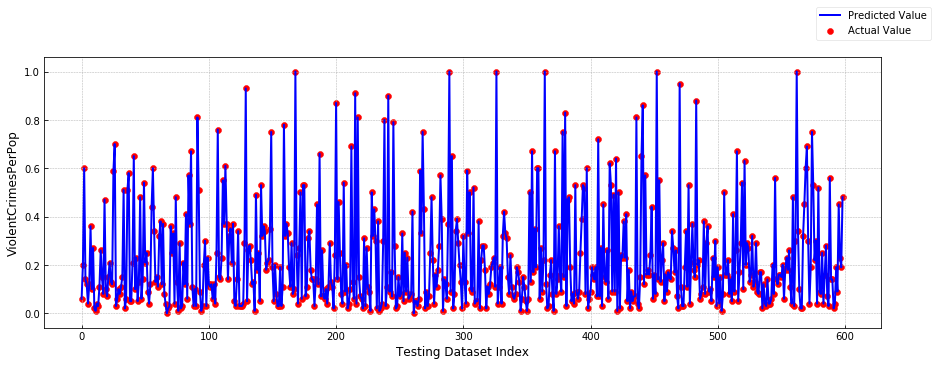

In [36]:
assume=[i for i in range(len(yPrediction))]
plt.scatter(assume,yTest,c='r',label="Actual Value")
plt.plot(assume, yPrediction, color = 'blue',label="Predicted Value")
plt.ylabel("ViolentCrimesPerPop")
plt.xlabel("Testing Dataset Index")
plt.legend(loc=1,borderaxespad=-5)
#Styling

plt.style.use("bmh")
plt.rcParams.update({"figure.figsize" : (15, 5),
                     "axes.facecolor" : "white",
                     "axes.edgecolor":  "black"})

plt.show()

# 	&#x2B50; Polynomial Regression


In [32]:
poly=PolynomialFeatures(degree=2)
poly_x=poly.fit_transform(x)

regressor=LinearRegression()
regressor.fit(poly_x,y)
z=regressor.predict(poly.fit_transform(xTest))


for i in range(len(z)):
     print("○ Predicted Value: ","{0:.4f}".format(z[i]),"| Actual Value: ","{0:.4f}".format(yTest[i]))

○ Predicted Value:  0.0600 | Actual Value:  0.0600
○ Predicted Value:  0.2000 | Actual Value:  0.2000
○ Predicted Value:  0.6000 | Actual Value:  0.6000
○ Predicted Value:  0.1400 | Actual Value:  0.1400
○ Predicted Value:  0.1200 | Actual Value:  0.1200
○ Predicted Value:  0.0400 | Actual Value:  0.0400
○ Predicted Value:  0.1200 | Actual Value:  0.1200
○ Predicted Value:  0.3600 | Actual Value:  0.3600
○ Predicted Value:  0.1000 | Actual Value:  0.1000
○ Predicted Value:  0.2700 | Actual Value:  0.2700
○ Predicted Value:  0.0200 | Actual Value:  0.0200
○ Predicted Value:  0.0100 | Actual Value:  0.0100
○ Predicted Value:  0.0400 | Actual Value:  0.0400
○ Predicted Value:  0.0300 | Actual Value:  0.0300
○ Predicted Value:  0.1100 | Actual Value:  0.1100
○ Predicted Value:  0.2600 | Actual Value:  0.2600
○ Predicted Value:  0.1500 | Actual Value:  0.1500
○ Predicted Value:  0.0800 | Actual Value:  0.0800
○ Predicted Value:  0.4700 | Actual Value:  0.4700
○ Predicted Value:  0.1000 | Ac

○ Predicted Value:  0.2000 | Actual Value:  0.2000
○ Predicted Value:  0.2900 | Actual Value:  0.2900
○ Predicted Value:  0.2700 | Actual Value:  0.2700
○ Predicted Value:  0.1300 | Actual Value:  0.1300
○ Predicted Value:  0.1600 | Actual Value:  0.1600
○ Predicted Value:  0.3200 | Actual Value:  0.3200
○ Predicted Value:  0.1100 | Actual Value:  0.1100
○ Predicted Value:  0.1300 | Actual Value:  0.1300
○ Predicted Value:  0.2900 | Actual Value:  0.2900
○ Predicted Value:  0.0900 | Actual Value:  0.0900
○ Predicted Value:  0.0800 | Actual Value:  0.0800
○ Predicted Value:  0.1700 | Actual Value:  0.1700
○ Predicted Value:  0.1700 | Actual Value:  0.1700
○ Predicted Value:  0.0200 | Actual Value:  0.0200
○ Predicted Value:  0.1200 | Actual Value:  0.1200
○ Predicted Value:  0.0400 | Actual Value:  0.0400
○ Predicted Value:  0.0300 | Actual Value:  0.0300
○ Predicted Value:  0.1400 | Actual Value:  0.1400
○ Predicted Value:  0.0400 | Actual Value:  0.0400
○ Predicted Value:  0.0400 | Ac

### Calculating MSE error 
- Printing predicted , actual value
- Formulae to calculate **MSE**=$\frac{\sum_{i=1}^{n} {(Y_i-Y)^2}}{n}$ (Where Yᵢ is predicted value and Y is actual value, n is total number of testing data)

In [33]:
#MSE

error=0
for i in range(len(z)):
    error+=pow(z[i]-yTest[i],2)
error=error/27
error

1.5842394783621542e-29

### Plotting the Graph
- Curve trying to fit with the most of the actual value

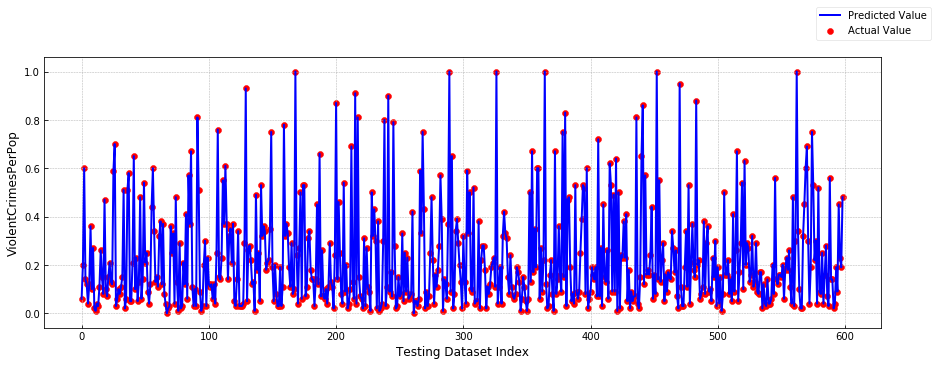

In [34]:
assume=[i for i in range(len(z))]
plt.scatter(assume,yTest,c='r',label="Actual Value")
plt.plot(assume, z, color = 'blue',label="Predicted Value")
plt.ylabel("ViolentCrimesPerPop")
plt.xlabel("Testing Dataset Index")
plt.legend(loc=1,borderaxespad=-5)
#Styling

plt.style.use("bmh")
plt.rcParams.update({"figure.figsize" : (15, 5),
                     "axes.facecolor" : "white",
                     "axes.edgecolor":  "black"})

plt.show()

# 	&#x2B50; Descision Tree

In [37]:
regressor = DecisionTreeRegressor(random_state =1)
regressor.fit(xTrain, yTrain)

# Predicting a new result
y_pred = regressor.predict(xTest)

for i in range(len(y_pred)):
     print("○ Predicted Value: ","{0:.4f}".format(y_pred[i]),"| Actual Value: ","{0:.4f}".format(yTest[i]))

○ Predicted Value:  0.0600 | Actual Value:  0.0600
○ Predicted Value:  0.2000 | Actual Value:  0.2000
○ Predicted Value:  0.6000 | Actual Value:  0.6000
○ Predicted Value:  0.1400 | Actual Value:  0.1400
○ Predicted Value:  0.1200 | Actual Value:  0.1200
○ Predicted Value:  0.0400 | Actual Value:  0.0400
○ Predicted Value:  0.1200 | Actual Value:  0.1200
○ Predicted Value:  0.3600 | Actual Value:  0.3600
○ Predicted Value:  0.1000 | Actual Value:  0.1000
○ Predicted Value:  0.2700 | Actual Value:  0.2700
○ Predicted Value:  0.0200 | Actual Value:  0.0200
○ Predicted Value:  0.0100 | Actual Value:  0.0100
○ Predicted Value:  0.0400 | Actual Value:  0.0400
○ Predicted Value:  0.0300 | Actual Value:  0.0300
○ Predicted Value:  0.1100 | Actual Value:  0.1100
○ Predicted Value:  0.2600 | Actual Value:  0.2600
○ Predicted Value:  0.1500 | Actual Value:  0.1500
○ Predicted Value:  0.0800 | Actual Value:  0.0800
○ Predicted Value:  0.4700 | Actual Value:  0.4700
○ Predicted Value:  0.1000 | Ac

○ Predicted Value:  0.2100 | Actual Value:  0.2100
○ Predicted Value:  0.3700 | Actual Value:  0.3700
○ Predicted Value:  0.1800 | Actual Value:  0.1800
○ Predicted Value:  0.1500 | Actual Value:  0.1500
○ Predicted Value:  0.9000 | Actual Value:  0.8800
○ Predicted Value:  0.2000 | Actual Value:  0.2000
○ Predicted Value:  0.2200 | Actual Value:  0.2200
○ Predicted Value:  0.0600 | Actual Value:  0.0600
○ Predicted Value:  0.0800 | Actual Value:  0.0800
○ Predicted Value:  0.1100 | Actual Value:  0.1100
○ Predicted Value:  0.3800 | Actual Value:  0.3800
○ Predicted Value:  0.0800 | Actual Value:  0.0800
○ Predicted Value:  0.2900 | Actual Value:  0.2900
○ Predicted Value:  0.3600 | Actual Value:  0.3600
○ Predicted Value:  0.0900 | Actual Value:  0.0900
○ Predicted Value:  0.1000 | Actual Value:  0.1000
○ Predicted Value:  0.0500 | Actual Value:  0.0500
○ Predicted Value:  0.2300 | Actual Value:  0.2300
○ Predicted Value:  0.1500 | Actual Value:  0.1500
○ Predicted Value:  0.3000 | Ac

### Calculating MSE error 
- Printing predicted , actual value
- Formulae to calculate **MSE**=$\frac{\sum_{i=1}^{n} {(Y_i-Y)^2}}{n}$ (Where Yᵢ is predicted value and Y is actual value, n is total number of testing data)

In [38]:
#MSE

error=0
for i in range(len(y_pred)):
    error+=pow(y_pred[i]-yTest[i],2)
error=error/27
error

0.00010000000000000002

### Plotting the Graph
- Curve trying to fit with the most of the actual value

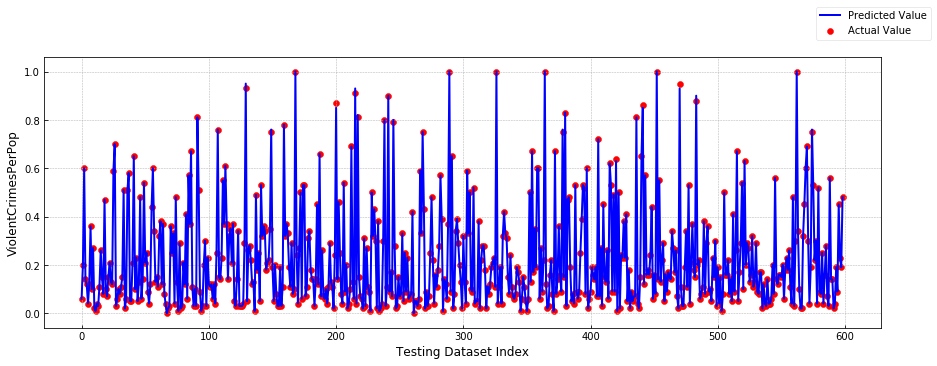

In [39]:
assume=[i for i in range(len(y_pred))]
plt.scatter(assume,yTest,c='r',label="Actual Value")
plt.plot(assume, y_pred, color = 'blue',label="Predicted Value")
plt.ylabel("ViolentCrimesPerPop")
plt.xlabel("Testing Dataset Index")
plt.legend(loc=1,borderaxespad=-5)
#Styling

plt.style.use("bmh")
plt.rcParams.update({"figure.figsize" : (15, 5),
                     "axes.facecolor" : "white",
                     "axes.edgecolor":  "black"})

plt.show()